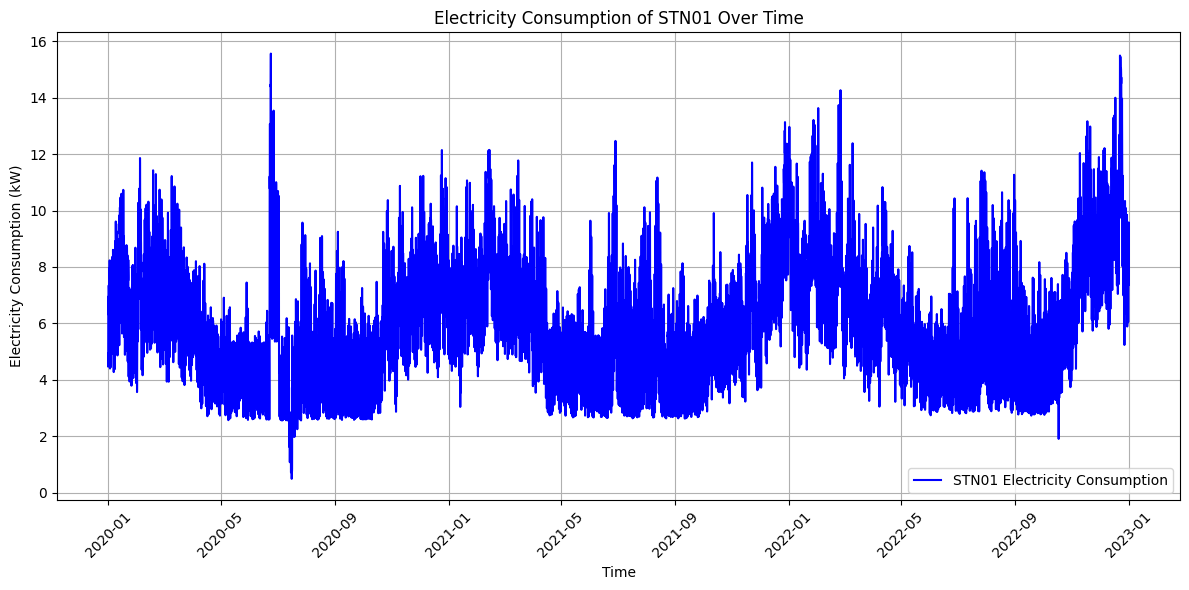

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
file_path = '/content/load_data.csv'  # Replace with the correct file path
load_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
load_data.head()

# Convert the 'Time' column to datetime format for easier plotting
load_data['Time'] = pd.to_datetime(load_data['Time'])

# Plot STN01 electricity consumption over time
plt.figure(figsize=(12, 6))
plt.plot(load_data['Time'], load_data['STN48'], label='STN01 Electricity Consumption', color='blue')
plt.xlabel('Time')
plt.ylabel('Electricity Consumption (kW)')
plt.title('Electricity Consumption of STN01 Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [3]:
# Calculate the total electricity consumption for each station
total_consumption = load_data.iloc[:, 1:].sum()

# Create a dataframe for better visualization
total_consumption_df = total_consumption.reset_index()
total_consumption_df.columns = ['Station', 'Total Consumption (mW)']

# Format the 'Total Consumption' column to avoid scientific notation
total_consumption_df['Total Consumption (mW)'] = total_consumption_df['Total Consumption (mW)'].apply(lambda x: f"{x:,.2f}")
total_consumption_df
print(total_consumption_df)


   Station Total Consumption (mW)
0    STN01             260,605.95
1    STN02             322,349.95
2    STN03             200,785.10
3    STN04             272,348.98
4    STN05             274,470.66
5    STN06             302,330.16
6    STN07             275,219.84
7    STN08             195,869.79
8    STN09             197,185.41
9    STN10             268,287.22
10   STN11             404,709.24
11   STN12             326,911.26
12   STN13             230,316.62
13   STN14             238,022.10
14   STN16           2,110,002.30
15   STN17             363,507.24
16   STN18             218,829.92
17   STN19             319,127.81
18   STN20             287,732.84
19   STN21             315,011.84
20   STN22             272,291.00
21   STN23             251,339.49
22   STN24             166,919.84
23   STN28             277,225.39
24   STN29             238,901.38
25   STN30             412,471.73
26   STN32             288,013.43
27   STN33             235,878.89
28   STN34    

In [4]:
sum = total_consumption_df['Total Consumption (mW)'].sum()
print(sum)

260,605.95322,349.95200,785.10272,348.98274,470.66302,330.16275,219.84195,869.79197,185.41268,287.22404,709.24326,911.26230,316.62238,022.102,110,002.30363,507.24218,829.92319,127.81287,732.84315,011.84272,291.00251,339.49166,919.84277,225.39238,901.38412,471.73288,013.43235,878.89334,720.03368,909.69267,809.770.00440,370.52333,543.43210,976.79363,973.84240,058.31176,514.1177,522.40356,996.81162,007.76


In [5]:
total_consumption_df.to_csv('total_consumption.csv', index=False)

In [6]:
# Remove STN38 from the dataframe
filtered_consumption_df = total_consumption_df[total_consumption_df['Station'] != 'STN38']

# Find the station with the minimum total consumption again
min_consumption_filtered_stn = filtered_consumption_df.loc[filtered_consumption_df['Total Consumption (mW)'].idxmin()]
min_consumption_filtered_stn


,40
Station,STN48
Total Consumption (mW),"162,007.76"


In [8]:
# Find the station with the maximum total consumption again
max_consumption_stn = total_consumption_df.loc[total_consumption_df['Total Consumption (mW)'].idxmax()]
max_consumption_stn


,38
Station,STN46
Total Consumption (mW),"77,522.40"


Addressing the missing values

In [16]:
import pandas as pd

# Load your data
load_data = pd.read_csv('load_data.csv')

# Handling Missing Values
# Fill missing values only in numeric columns with the mean
numeric_columns = load_data.select_dtypes(include=['number']).columns
load_data[numeric_columns] = load_data[numeric_columns].fillna(load_data[numeric_columns].mean())

# Save the cleaned dataset to a new CSV file
load_data.to_csv('cleaned_load_data.csv', index=False)
print("Cleaned dataset saved as 'cleaned_load_data.csv'.")

# Calculate the total electricity consumption for each station
total_consumption = load_data.iloc[:, 1:].sum()

# Create a dataframe for better visualization
total_consumption_df = total_consumption.reset_index()
total_consumption_df.columns = ['Station', 'Total Consumption (mW)']

# Format the 'Total Consumption' column to avoid scientific notation
total_consumption_df['Total Consumption (mW)'] = total_consumption_df['Total Consumption (mW)'].apply(lambda x: f"{x:,.2f}")

# Display the total consumption
print(total_consumption_df)

# Save the total consumption to a CSV file
total_consumption_df.to_csv('total_consumption.csv', index=False)
print("Total consumption saved as 'total_consumption.csv'.")

# Remove STN38 from the dataframe
filtered_consumption_df = total_consumption_df[total_consumption_df['Station'] != 'STN38']

# Find the station with the minimum total consumption again
min_consumption_filtered_stn = filtered_consumption_df.loc[filtered_consumption_df['Total Consumption (mW)'].idxmin()]
print("Station with minimum consumption (excluding STN38):")
print(min_consumption_filtered_stn)

# Find the station with the maximum total consumption again
max_consumption_stn = total_consumption_df.loc[total_consumption_df['Total Consumption (mW)'].idxmax()]
print("Station with maximum consumption:")
print(max_consumption_stn)


Cleaned dataset saved as 'cleaned_load_data.csv'.
   Station Total Consumption (mW)
0    STN01             260,883.66
1    STN02             322,693.45
2    STN03             200,999.06
3    STN04             272,639.20
4    STN05             274,763.14
5    STN06             302,652.33
6    STN07             275,513.12
7    STN08             196,078.51
8    STN09             212,520.08
9    STN10             268,573.11
10   STN11             405,140.51
11   STN12             327,259.62
12   STN13             230,562.04
13   STN14             238,275.73
14   STN16           2,112,250.74
15   STN17             363,894.60
16   STN18             219,063.11
17   STN19             319,467.88
18   STN20             288,039.45
19   STN21             315,347.52
20   STN22             272,581.16
21   STN23             251,607.32
22   STN24             167,097.71
23   STN28             277,520.81
24   STN29             239,155.95
25   STN30             412,911.26
26   STN32             288,320.3

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Load the dataset
data = pd.read_csv('load_data.csv')

# Ensure the 'Time' column is in datetime format
if 'Time' in data.columns:
    data['Time'] = pd.to_datetime(data['Time'])

# Handle missing values for all stations except STN38
numeric_columns = data.select_dtypes(include=['number']).columns
columns_to_impute = numeric_columns.drop('STN38', errors='ignore')  # Exclude STN38
data[columns_to_impute] = data[columns_to_impute].fillna(data[columns_to_impute].mean())

# Remove STN38 completely from the dataset
if 'STN38' in data.columns:
    data = data.drop(columns=['STN38'])

# Save the cleaned dataset to a new CSV file
data.to_csv('cleaned_load_data_without_stn38.csv', index=False)
print("Cleaned dataset saved as 'cleaned_load_data_without_stn38.csv'.")


Cleaned dataset saved as 'cleaned_load_data_without_stn38.csv'.


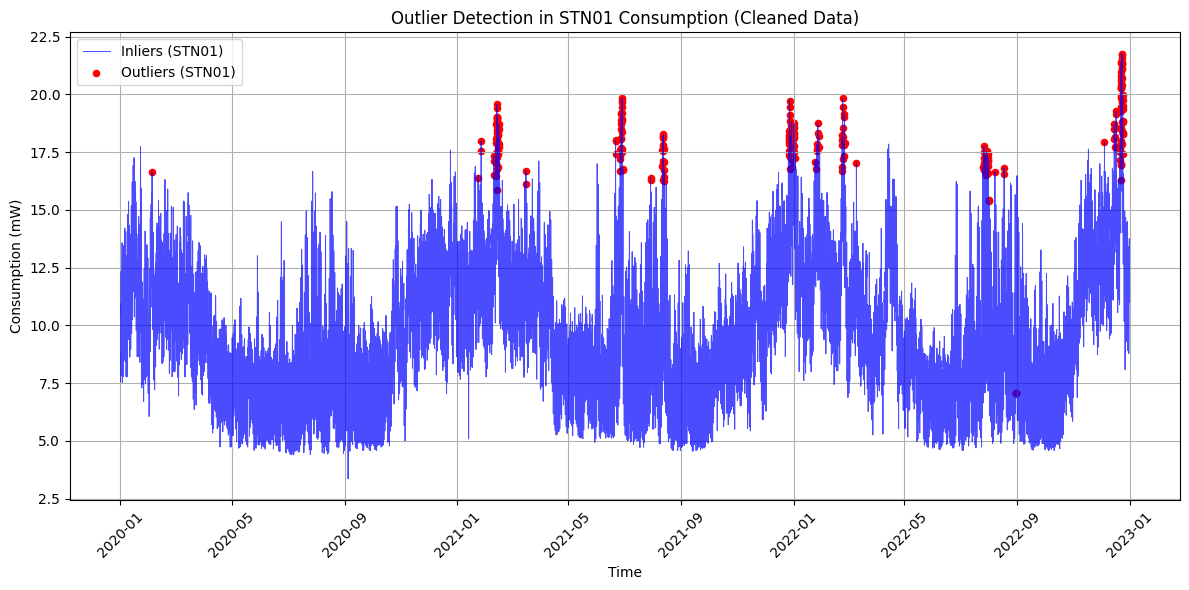

264

In [22]:
# Outlier Detection using Isolation Forest on the cleaned data
numeric_data_cleaned = data.select_dtypes(include=['number'])  # Use only numeric columns

# Using Isolation Forest for outlier detection
model_cleaned = IsolationForest(contamination=0.01, random_state=42)  # 1% of data assumed as outliers
outlier_labels_cleaned = model_cleaned.fit_predict(numeric_data_cleaned)

# Add outlier labels to the cleaned dataset
data['Outlier'] = outlier_labels_cleaned

# Separate outliers and inliers for visualization
outliers_cleaned = data[data['Outlier'] == -1]
inliers_cleaned = data[data['Outlier'] == 1]

# Visualize outliers for a selected station (e.g., STN01)
plt.figure(figsize=(12, 6))
plt.plot(data['Time'], data['STN01'], color='blue', label='Inliers (STN01)', alpha=0.7, linewidth=0.7)
plt.scatter(outliers_cleaned['Time'], outliers_cleaned['STN01'], color='red', label='Outliers (STN01)', s=20)

# Format the plot
plt.title('Outlier Detection in STN01 Consumption (Cleaned Data)')
plt.xlabel('Time')
plt.ylabel('Consumption (mW)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Count and display the number of outliers detected
outlier_count_cleaned = len(outliers_cleaned)
outlier_count_cleaned


<ipython-input-23-4849146b2c70>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_cleaned['Month'] = outliers_cleaned['Time'].dt.month
<ipython-input-23-4849146b2c70>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_cleaned['Year'] = outliers_cleaned['Time'].dt.year


<Figure size 1000x600 with 0 Axes>

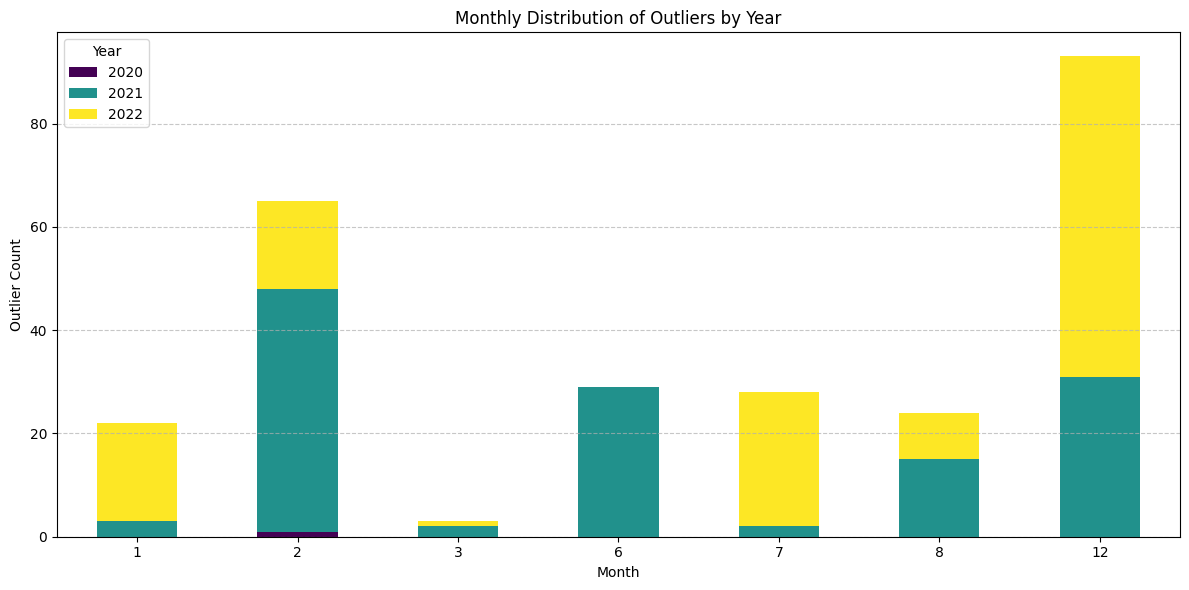

In [23]:
# Group outliers by month and year for visualization
outliers_cleaned['Month'] = outliers_cleaned['Time'].dt.month
outliers_cleaned['Year'] = outliers_cleaned['Time'].dt.year
outliers_grouped = outliers_cleaned.groupby(['Year', 'Month']).size().reset_index(name='Outlier Count')

# Pivot the data for better visualization in a heatmap-style bar plot
outliers_pivot = outliers_grouped.pivot(index='Month', columns='Year', values='Outlier Count')

# Plot the heatmap-style bar plot
plt.figure(figsize=(10, 6))
outliers_pivot.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 6))

plt.title('Monthly Distribution of Outliers by Year')
plt.xlabel('Month')
plt.ylabel('Outlier Count')
plt.legend(title='Year')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
